In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ordini_amazon.csv")
df.head()

,Data,Articolo,Categoria,Prezzo,Quantità,Stato
0,2024-01-04,Cuffie Bluetooth,Elettronica,39.99,1,Consegnato
1,2024-01-18,T-shirt nera,Abbigliamento,14.99,2,Consegnato
2,2024-02-05,Libro Python,Libri,23.50,1,Consegnato
3,2024-02-18,Lampada LED,Casa,27.90,1,Consegnato
4,2024-03-03,Scarpe sportive,Abbigliamento,54.00,1,Consegnato


In [8]:
ordini_consegnati = df[df["Stato"] == "Consegnato"]
ordini_consegnati

,Data,Articolo,Categoria,Prezzo,Quantità,Stato
0,2024-01-04,Cuffie Bluetooth,Elettronica,39.99,1,Consegnato
1,2024-01-18,T-shirt nera,Abbigliamento,14.99,2,Consegnato
2,2024-02-05,Libro Python,Libri,23.50,1,Consegnato
3,2024-02-18,Lampada LED,Casa,27.90,1,Consegnato
4,2024-03-03,Scarpe sportive,Abbigliamento,54.00,1,Consegnato
5,2024-03-20,Custodia telefono,Elettronica,12.99,1,Consegnato
6,2024-04-01,Pentola antiaderente,Casa,31.90,1,Consegnato
8,2024-05-02,Libro Data Science,Libri,28.00,1,Consegnato
9,2024-05-16,Calzini sportivi,Abbigliamento,9.99,3,Consegnato


In [12]:
df["Totale"] = df["Quantità"] * df["Prezzo"]
df

,Data,Articolo,Categoria,Prezzo,Quantità,Stato,Totale
0,2024-01-04,Cuffie Bluetooth,Elettronica,39.99,1,Consegnato,39.99
1,2024-01-18,T-shirt nera,Abbigliamento,14.99,2,Consegnato,29.98
2,2024-02-05,Libro Python,Libri,23.50,1,Consegnato,23.50
3,2024-02-18,Lampada LED,Casa,27.90,1,Consegnato,27.90
4,2024-03-03,Scarpe sportive,Abbigliamento,54.00,1,Consegnato,54.00
5,2024-03-20,Custodia telefono,Elettronica,12.99,1,Consegnato,12.99
6,2024-04-01,Pentola antiaderente,Casa,31.90,1,Consegnato,31.90
7,2024-04-14,Mouse wireless,Elettronica,18.99,1,Reso,18.99
8,2024-05-02,Libro Data Science,Libri,28.00,1,Consegnato,28.00
9,2024-05-16,Calzini sportivi,Abbigliamento,9.99,3,Consegnato,29.97


In [13]:
totale_per_categoria = df.groupby("Categoria")["Totale"].sum().reset_index()
totale_per_categoria

,Categoria,Totale
0,Abbigliamento,113.95
1,Casa,59.80
2,Elettronica,71.97
3,Libri,51.50


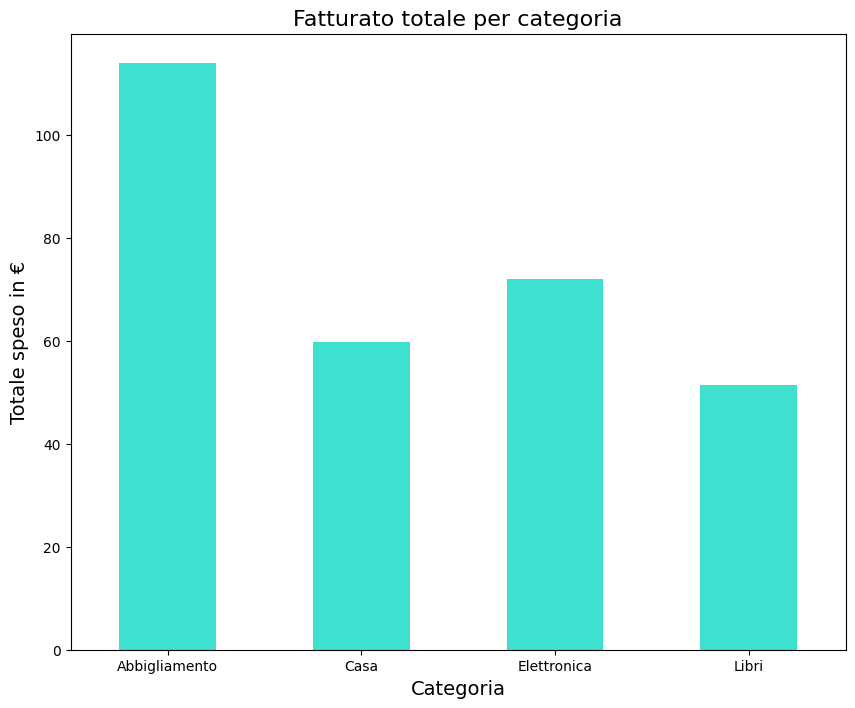

In [30]:
plt.figure(figsize=(10, 8))
totale_per_categoria = df.groupby("Categoria")["Totale"].sum()
totale_per_categoria.plot(kind='bar', color = "turquoise")
plt.title("Fatturato totale per categoria", fontsize=16)
plt.xlabel("Categoria", fontsize=14)
plt.ylabel("Totale speso in €", fontsize=14)

plt.xticks(rotation=0)
plt.show()

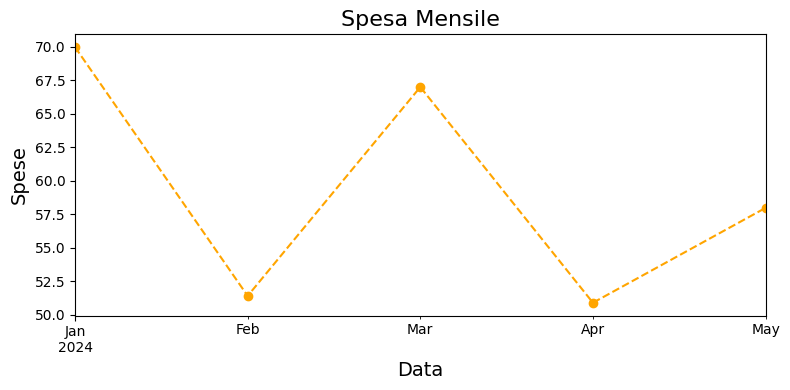

In [ ]:
df["Data"] = pd.to_datetime(df["Data"])
df["Mese"] = df["Data"].dt.to_period("M")
spesa_mensile = df.groupby("Mese")["Totale"].sum()

plt.figure(figsize=(8, 4))
spesa_mensile.plot(marker='o', linestyle = "--", color='orange')
plt.title("Spesa Mensile", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Spese", fontsize=14)
plt.tight_layout()